C:\Users\user\AppData\Local\Temp\ipykernel_12116\1074779746.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Date': 'ds'}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12116\1074779746.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Total': 'y'}, inplace=True)
13:25:52 - cmdstanpy - INFO - Chain [1] start processing


         Date     Total
496  1/1/2019  132.7620
484  1/1/2019  388.2900
567  1/1/2019  621.2430
523  1/1/2019  132.0270
970  1/1/2019  888.6150
..        ...       ...
393  3/9/2019  548.7300
73   3/9/2019  478.2330
433  3/9/2019  702.2190
585  3/9/2019  217.1820
84   3/9/2019  256.7775

[1000 rows x 2 columns]


13:25:52 - cmdstanpy - INFO - Chain [1] done processing


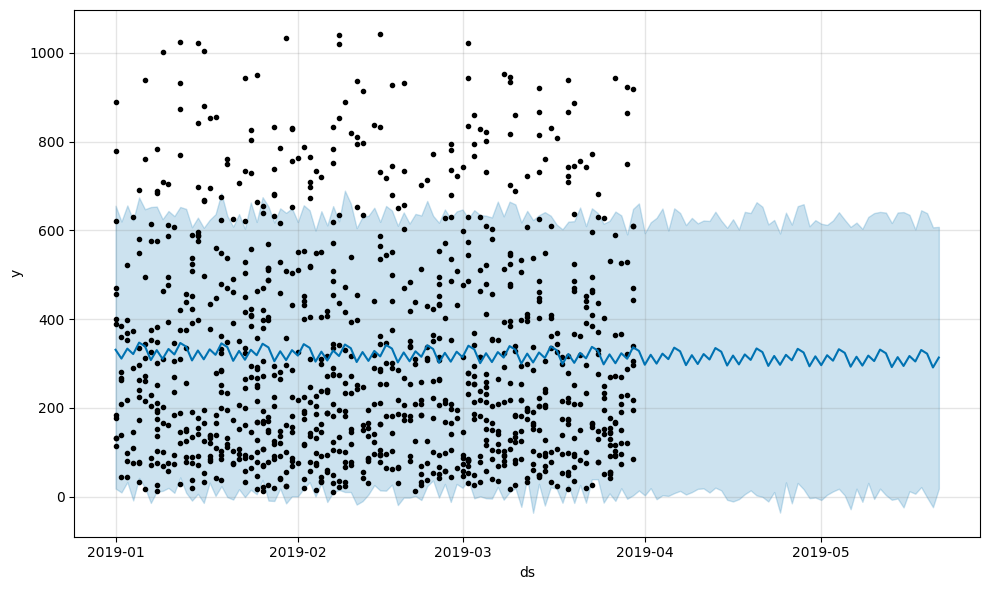

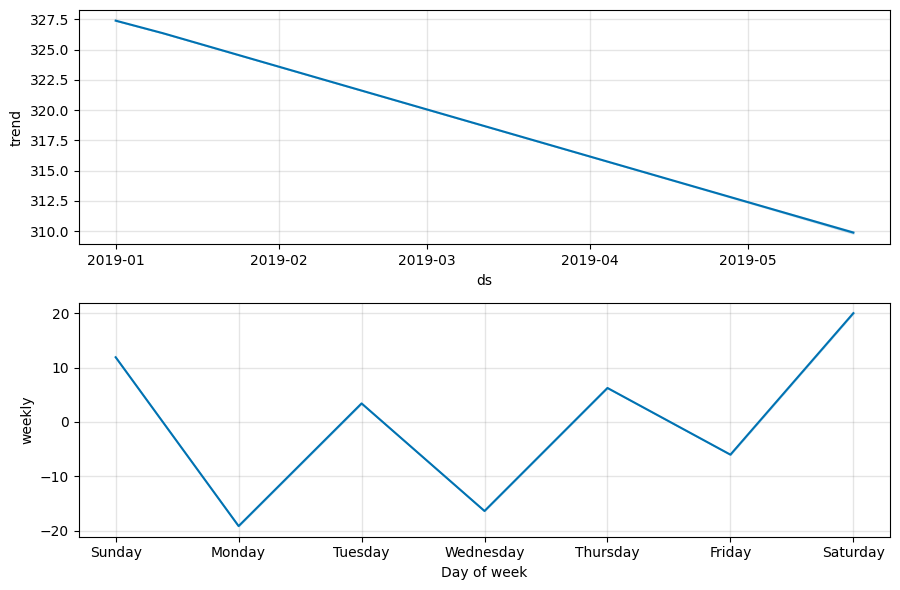

In [16]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime

df = pd.read_csv('supermarket.csv')

df.head()


# Sort DataFrame by date column
df.sort_values(by='Date', inplace = True)


result = df.loc[:,['Date', 'Total']]
print(result)

df2 = df[['Date','Total']]
df2.rename(columns={'Date': 'ds'}, inplace=True)
df2.rename(columns={'Total': 'y'}, inplace=True)

df2.head()

m = Prophet()
m.fit(df2)

future = m.make_future_dataframe(periods = 52)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


